In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix


In [3]:
# Load the dataset
data = pd.read_csv("Battery_RUL.csv")

# Assuming 'RUL' is the target column
X = data.drop('RUL', axis=1)  # Features
y = data['RUL']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)


In [4]:
# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Convert continuous predictions to discrete classes (binary classes based on threshold)
threshold = 50  # Set your threshold here
y_pred_classes = [1 if pred >= threshold else 0 for pred in y_pred]
y_test_classes = [1 if true_val >= threshold else 0 for true_val in y_test]

In [5]:
# Calculate evaluation metrics for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Calculate confusion matrix for binary classes
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Mean Squared Error: 14.34
R-squared (R2) Score: 1.00
Confusion Matrix:
[[ 141    3]
 [   5 2864]]


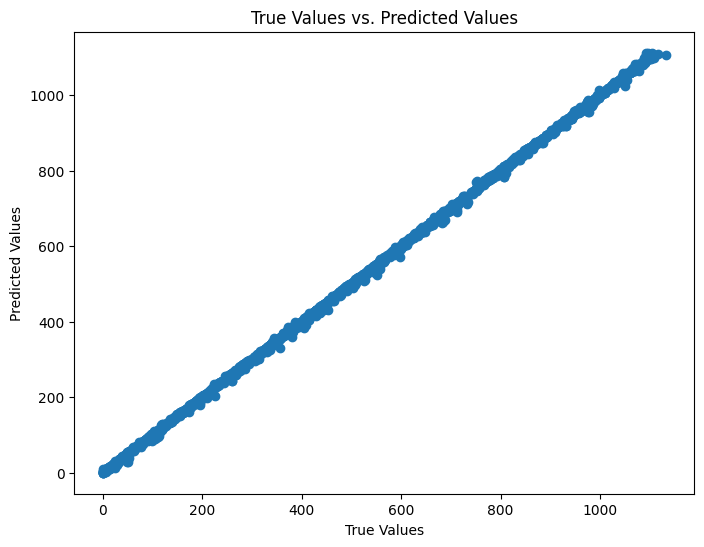

In [6]:
import matplotlib.pyplot as plt

# Plotting true values against predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()
